Information about the Housing Dataset

In [546]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [547]:
df=pd.read_csv('/content/drive/MyDrive/housing.csv')

In [548]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [549]:
df.shape

(20640, 10)

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [551]:
#find information about all mean median mode of each column
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [552]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [553]:
print(df['ocean_proximity'])
print(df['ocean_proximity'].value_counts())

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


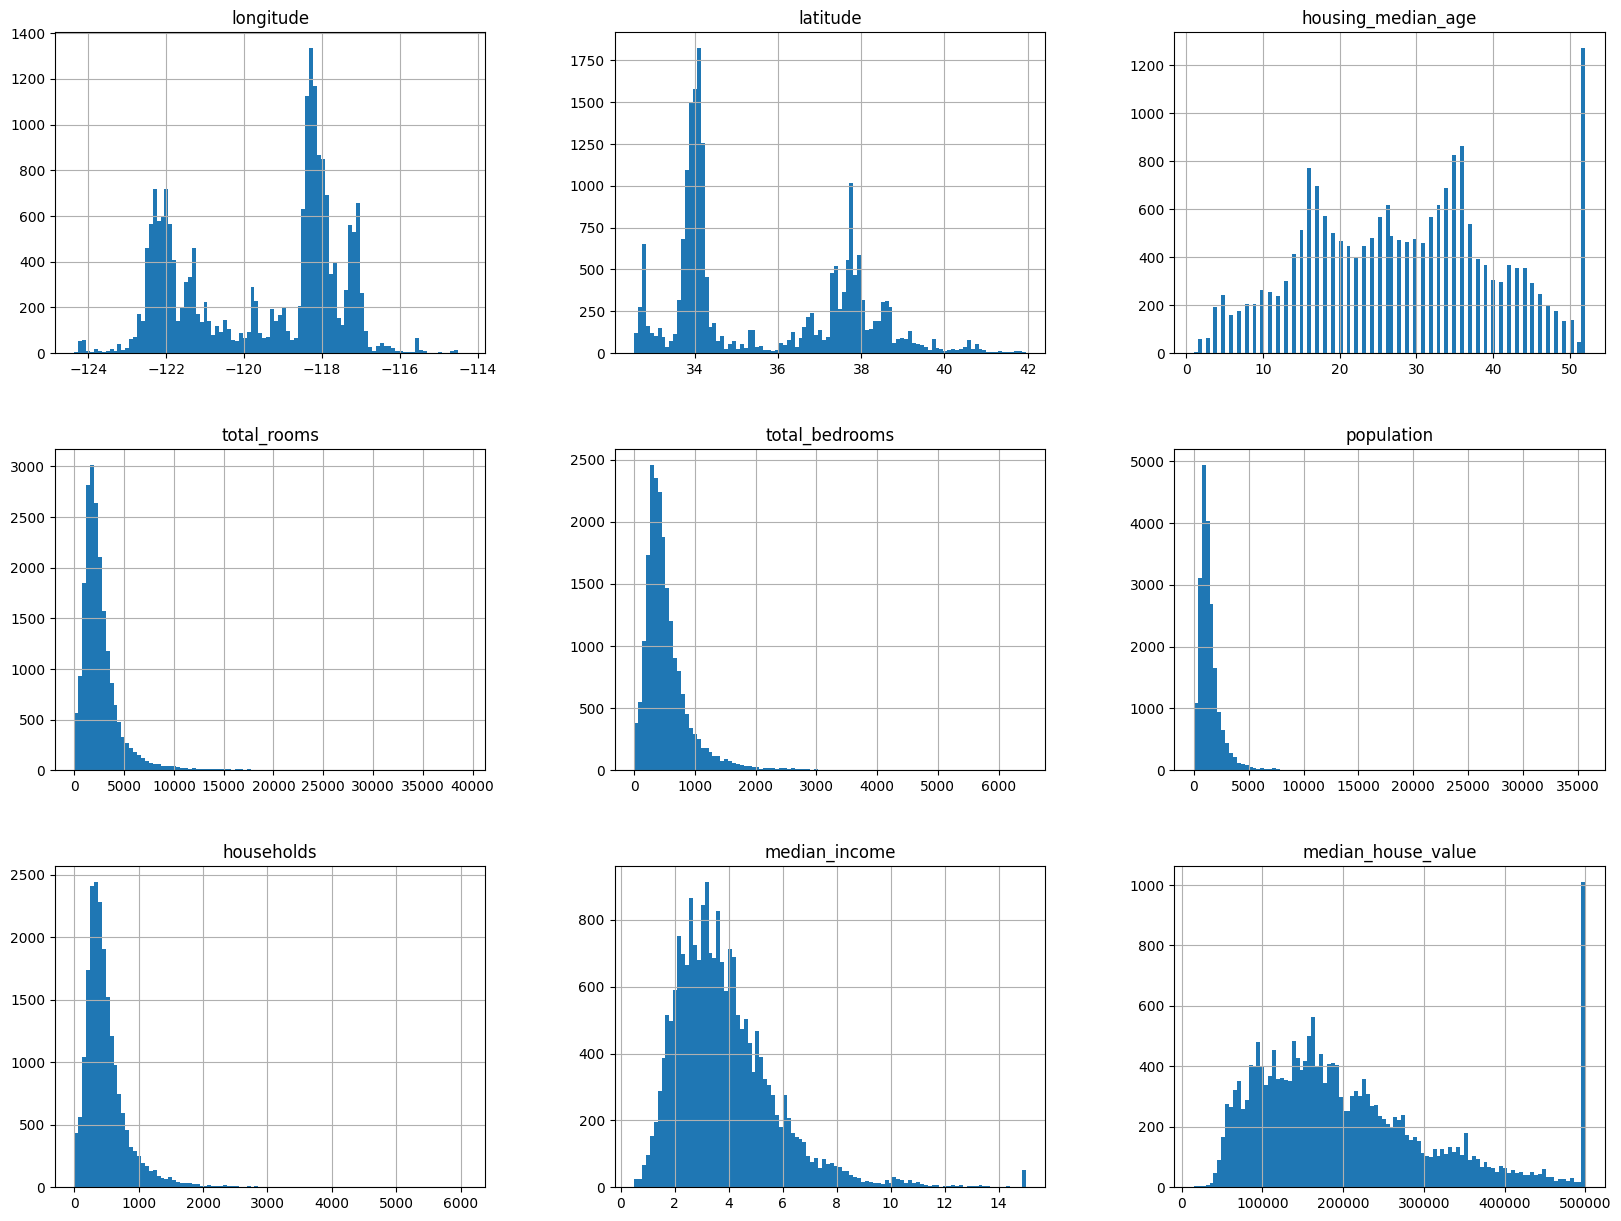

In [554]:
#bins is the intervals data is shown on
df.hist(bins=100,figsize=(20,15))
plt.show()
# tail heavy histograms we need to feed bell shaped for any ML algorithms

In [555]:
#we need our dataset to be representative of various categories
df['income_cat']=pd.cut(df['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

In [556]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['income_cat']):
  train=df.loc[train_index]
  test=df.loc[test_index]
train.drop(['income_cat'],axis=1,inplace=True)
test.drop(['income_cat'],axis=1,inplace=True)
housing=train.copy()

### Data Exploration


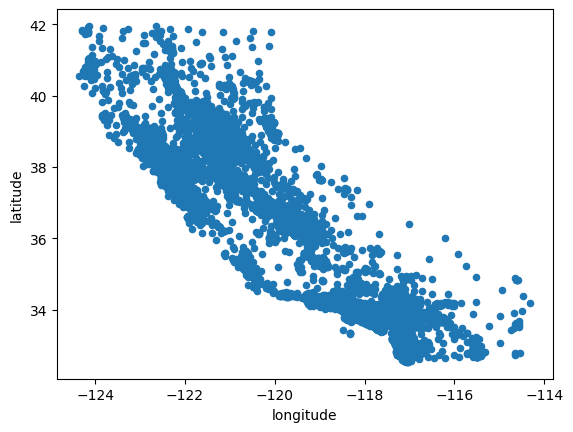

In [557]:
df.plot(kind='scatter',x='longitude',y='latitude')
#data looks like map of california because districts are from Cali
plt.show()

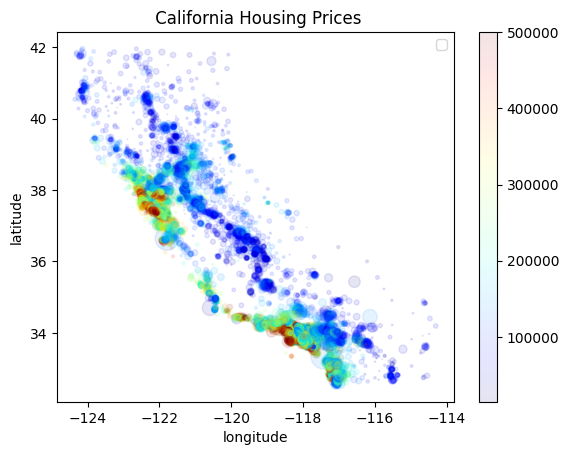

In [558]:
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,title=' California Housing Prices', s=df['population']/100,cmap=plt.get_cmap('jet'),c=df['median_house_value'])
#alpha parameter lets us see denser areas clearly
#the s parameter is for size, higher population bigger circle
#cmap is a colormap, higher housing values have red
plt.legend()
plt.show()
#coast side houses expensive and more dense

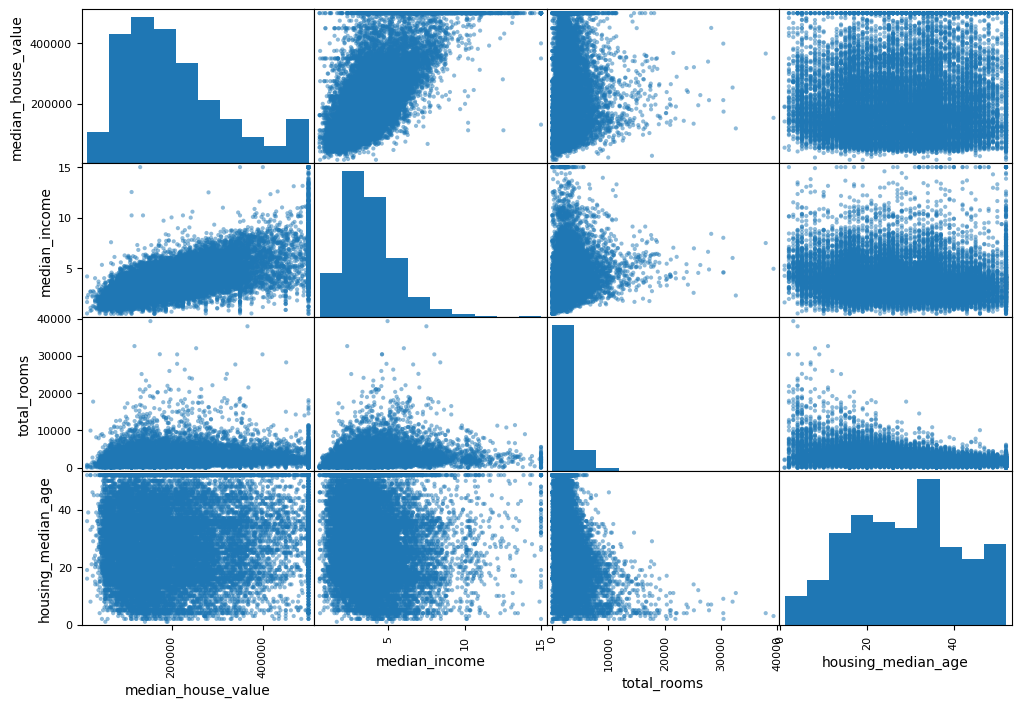

In [559]:
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df[attributes],figsize=(12,8))
plt.show()


<Axes: xlabel='median_income', ylabel='median_house_value'>

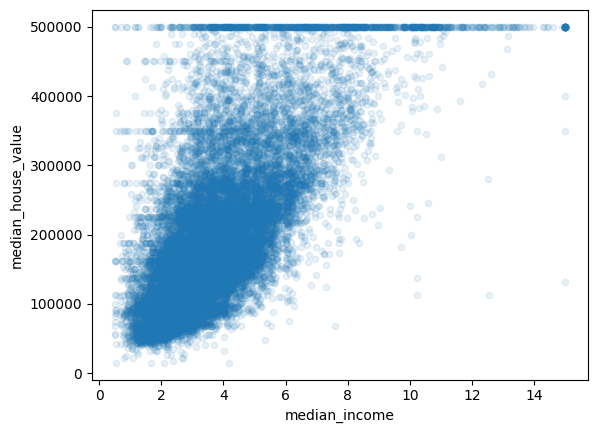

In [560]:
df.plot(x='median_income',y='median_house_value',kind='scatter',alpha=0.1)
#strong correlatioon, values increase along line, issues are horizontal lines

In [561]:
#form new attributes and check if theyre more correlated than median housing value
df['rooms_per_household']=df['total_rooms']/df['households']
df['bedrooms_per_room']=df['total_bedrooms']/df['total_rooms']
df['population_per_household']=df['population']/df['households']

In [562]:
df['population_per_household'].mean()

3.0706551594363742

### Data Preparation

In [563]:
housing=train.drop('median_house_value',axis=1)
housing_labels=train['median_house_value'].copy()

In [564]:
#only categorical, replace with one hot encoding
oceanprox=pd.get_dummies(housing['ocean_proximity'],drop_first=True)
housing=housing.drop(['ocean_proximity'],axis=1)
housing=pd.concat([housing,oceanprox],axis=1)
housing.head()
oceanprox=pd.get_dummies(test['ocean_proximity'],drop_first=True)
test=test.drop(['ocean_proximity'],axis=1)
test=pd.concat([test,oceanprox],axis=1)

In [565]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median',)
imputer.fit(housing)
median=housing['latitude'].median()
print(median)

#all attributes' median is stored in statistics
print(imputer.statistics_)
filled=imputer.transform(housing)
housing=pd.DataFrame(filled,columns=housing.columns)
imputer.fit(test)
median=test['latitude'].median()
print(median)

#all attributes' median is stored in statistics
print(imputer.statistics_)
filled=imputer.transform(test)
test=pd.DataFrame(filled,columns=test.columns)

34.26
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155    0.         0.         0.         0.     ]
34.22
[-1.1846e+02  3.4220e+01  2.8000e+01  2.1595e+03  4.4200e+02  1.1725e+03
  4.1600e+02  3.5132e+00  1.8130e+05  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00]


In [566]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.0,0.0,0.0,0.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,0.0,0.0,1.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.0,0.0,0.0,0.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,0.0,0.0,1.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0.0,0.0,0.0,0.0


In [567]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,0.0,0.0,0.0,0.0
1,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,0.0,0.0,0.0,0.0
2,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,0.0,0.0,0.0,0.0
3,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,0.0,0.0,0.0,0.0
4,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,0.0,0.0,0.0,1.0


In [568]:
label=train['median_house_value'].copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.0,0.0,0.0,0.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,0.0,0.0,1.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.0,0.0,0.0,0.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,0.0,0.0,1.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,0.0,0.0,0.0,0.0
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.0,0.0,0.0,0.0
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.0,0.0,0.0,0.0
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,0.0,0.0,0.0,0.0


In [569]:
#null values in our total_bedrooms column so we need to drop it

#df.dropna(subset=['total_bedrooms'])

# or fill with median but we will need to use this median for our test too
#median=df['total_bedrooms'].median()
#df['total_bedrooms'].fillna(median,inplace=True)

#print(df.head())

In [570]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [571]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.0,0.0,0.0,0.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,0.0,0.0,1.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.0,0.0,0.0,0.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,0.0,0.0,1.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0.0,0.0,0.0,0.0


In [572]:
train.isna().sum()
test.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

###Feature Scaling

In [575]:
test_labels=test['median_house_value'].copy()
test.drop(['median_house_value'],axis=1,inplace=True)

In [576]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
     ('scaler', StandardScaler())
])
housing_num=my_pipeline.fit_transform(housing)
test_num=my_pipeline.transform(test)
housing_num_tr= pd.DataFrame(housing_num, columns=housing.columns)
test_tr=pd.DataFrame(test_num,columns=test.columns)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#train_scaled = scaler.fit_transform(housing_num_tr)
#test_scaled = scaler.transform(test)

In [586]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(housing_num_tr,label)


LinearRegression()

In [587]:
train_predictions = model.predict(housing_num_tr)
test_predictions = model.predict(test_tr)

In [590]:
train_score = model.score(housing_num_tr,label)
test_score = model.score(test_tr, test_labels)
print(train_score)
print(test_score)

0.6438078994746375
0.6520135106454601


In [592]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(housing_num_tr, housing_labels)

best_rf_model = grid_search.best_estimator_

test_score = best_rf_model.score(test_tr, test_labels)
print("Best Random Forest Test Score:", test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Random Forest Test Score: 0.8279281994173774
